# Fashion-MNIST Classification with ANN and CNN

This notebook implements end-to-end preprocessing, training, and evaluation pipelines for fully-connected and convolutional neural network models on the Fashion-MNIST dataset using TensorFlow/Keras. The workflow follows the coursework requirements, covering dataset handling, architecture design, training configuration, and evaluation/analysis steps.


In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

print('TensorFlow version:', tf.__version__)


TensorFlow version: 2.17.0


In [2]:
# Ensure reproducibility where possible
np.random.seed(42)
tf.random.set_seed(42)


In [3]:
# Load Fashion-MNIST dataset
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print('Training set shape:', train_images.shape)
print('Test set shape:', test_images.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


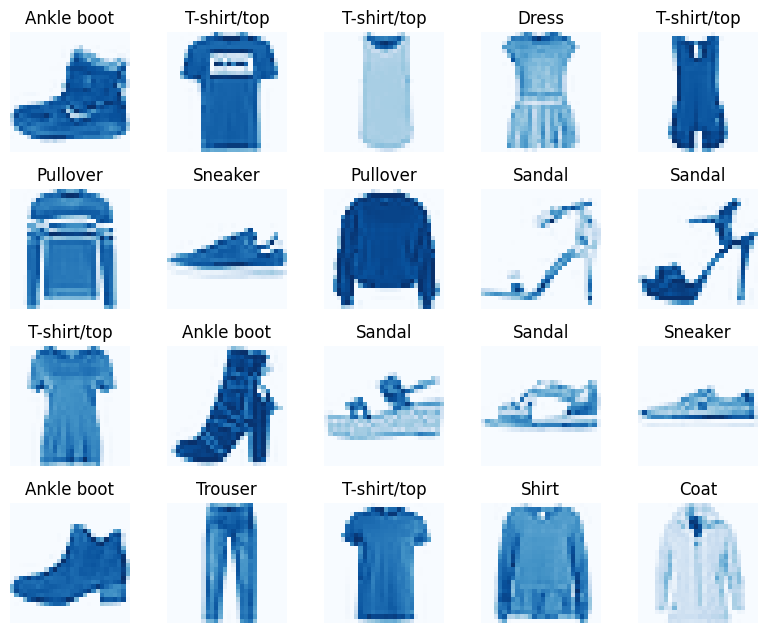

In [28]:
# Visualize a sample of raw training images
plt.figure(figsize=(8, 8))
for i in range(20):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='Blues')
    plt.title(class_names[train_labels[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [5]:
# Normalize and create validation split
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reserve 10,000 samples from the original training set for validation
val_images = train_images[-10000:]
val_labels = train_labels[-10000:]
train_images = train_images[:-10000]
train_labels = train_labels[:-10000]

print('Training set after split:', train_images.shape)
print('Validation set:', val_images.shape)
print('Test set:', test_images.shape)


Training set after split: (50000, 28, 28)
Validation set: (10000, 28, 28)
Test set: (10000, 28, 28)


In [6]:
# Prepare flattened inputs and one-hot encoded labels for ANN
train_images_ann = train_images.reshape((train_images.shape[0], -1))
val_images_ann = val_images.reshape((val_images.shape[0], -1))
test_images_ann = test_images.reshape((test_images.shape[0], -1))

train_labels_ann = to_categorical(train_labels, num_classes=10)
val_labels_ann = to_categorical(val_labels, num_classes=10)
test_labels_ann = to_categorical(test_labels, num_classes=10)

print('ANN input shape:', train_images_ann.shape)


ANN input shape: (50000, 784)


In [7]:
# Define the ANN architecture
ann_model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

ann_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Train the ANN model
ann_history = ann_model.fit(
    train_images_ann, train_labels_ann,
    epochs=30,
    batch_size=128,
    validation_data=(val_images_ann, val_labels_ann),
    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)],
    verbose=2
)


Epoch 1/30
391/391 - 4s - 10ms/step - accuracy: 0.7811 - loss: 0.6015 - val_accuracy: 0.8524 - val_loss: 0.4282
Epoch 2/30
391/391 - 2s - 6ms/step - accuracy: 0.8464 - loss: 0.4207 - val_accuracy: 0.8521 - val_loss: 0.4093
Epoch 3/30
391/391 - 2s - 6ms/step - accuracy: 0.8594 - loss: 0.3841 - val_accuracy: 0.8720 - val_loss: 0.3646
Epoch 4/30
391/391 - 2s - 6ms/step - accuracy: 0.8677 - loss: 0.3616 - val_accuracy: 0.8715 - val_loss: 0.3648
Epoch 5/30
391/391 - 2s - 5ms/step - accuracy: 0.8744 - loss: 0.3458 - val_accuracy: 0.8786 - val_loss: 0.3415
Epoch 6/30
391/391 - 3s - 6ms/step - accuracy: 0.8766 - loss: 0.3337 - val_accuracy: 0.8768 - val_loss: 0.3437
Epoch 7/30
391/391 - 2s - 6ms/step - accuracy: 0.8818 - loss: 0.3227 - val_accuracy: 0.8774 - val_loss: 0.3381
Epoch 8/30
391/391 - 2s - 5ms/step - accuracy: 0.8839 - loss: 0.3131 - val_accuracy: 0.8820 - val_loss: 0.3259
Epoch 9/30
391/391 - 2s - 5ms/step - accuracy: 0.8868 - loss: 0.3034 - val_accuracy: 0.8833 - val_loss: 0.3199


In [9]:
# Evaluate the ANN model on the test set
ann_test_loss, ann_test_acc = ann_model.evaluate(test_images_ann, test_labels_ann, verbose=2)
print(f'ANN Test accuracy: {ann_test_acc:.4f}')


313/313 - 0s - 1ms/step - accuracy: 0.8875 - loss: 0.3292
ANN Test accuracy: 0.8875


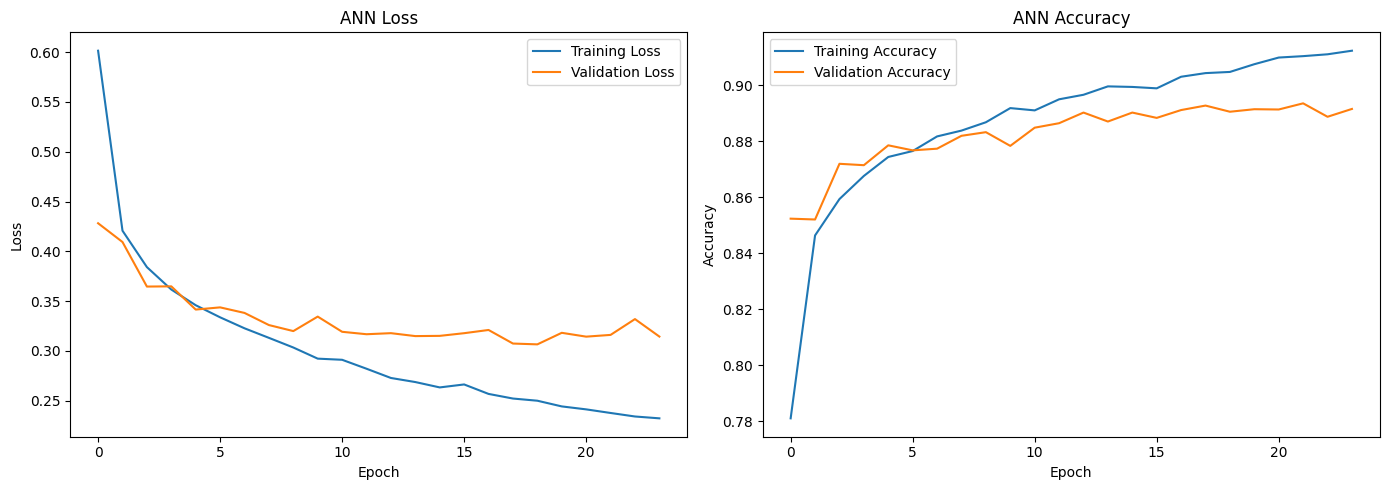

In [10]:
# Plot training history for the ANN
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(ann_history.history['loss'], label='Training Loss')
plt.plot(ann_history.history['val_loss'], label='Validation Loss')
plt.title('ANN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(ann_history.history['accuracy'], label='Training Accuracy')
plt.plot(ann_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


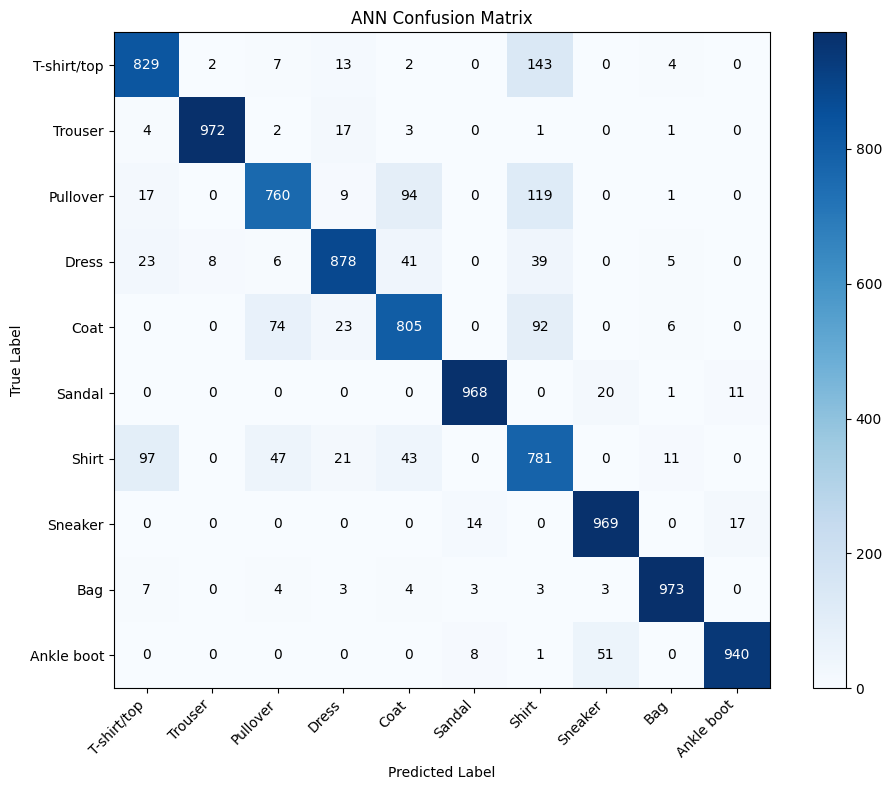

ANN Classification Report
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.83      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.84      0.76      0.80      1000
       Dress       0.91      0.88      0.89      1000
        Coat       0.81      0.81      0.81      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.66      0.78      0.72      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.97      0.94      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [11]:
# Confusion matrix and classification report for the ANN
ann_predictions = ann_model.predict(test_images_ann)
ann_pred_labels = np.argmax(ann_predictions, axis=1)

ann_cm = confusion_matrix(test_labels, ann_pred_labels)
plt.figure(figsize=(10, 8))
plt.imshow(ann_cm, interpolation='nearest', cmap='Blues')
plt.title('ANN Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45, ha='right')
plt.yticks(tick_marks, class_names)

for i in range(ann_cm.shape[0]):
    for j in range(ann_cm.shape[1]):
        plt.text(j, i, format(ann_cm[i, j], 'd'),
                 ha='center', va='center', color='white' if ann_cm[i, j] > ann_cm.max() / 2 else 'black')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

print('ANN Classification Report')
print(classification_report(test_labels, ann_pred_labels, target_names=class_names))


In [12]:
# Prepare inputs for the CNN (retain spatial structure)
train_images_cnn = np.expand_dims(train_images, axis=-1)
val_images_cnn = np.expand_dims(val_images, axis=-1)
test_images_cnn = np.expand_dims(test_images, axis=-1)

print('CNN input shape:', train_images_cnn.shape)


CNN input shape: (50000, 28, 28, 1)


In [13]:
# Define the CNN architecture
cnn_model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 897,802 (3.42 MB)

 Trainable params: 897,354 (3.42 MB)

 Non-trainable params: 448 (1.75 KB)

In [14]:
# Train the CNN model
cnn_history = cnn_model.fit(
    train_images_cnn, train_labels,
    epochs=30,
    batch_size=128,
    validation_data=(val_images_cnn, val_labels),
    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)],
    verbose=2
)


Epoch 1/30
391/391 - 30s - 76ms/step - accuracy: 0.8375 - loss: 0.4769 - val_accuracy: 0.6859 - val_loss: 1.0878
Epoch 2/30
391/391 - 28s - 73ms/step - accuracy: 0.8906 - loss: 0.3047 - val_accuracy: 0.8852 - val_loss: 0.3318
Epoch 3/30
391/391 - 28s - 72ms/step - accuracy: 0.9076 - loss: 0.2557 - val_accuracy: 0.9001 - val_loss: 0.2634
Epoch 4/30
391/391 - 31s - 80ms/step - accuracy: 0.9196 - loss: 0.2199 - val_accuracy: 0.9207 - val_loss: 0.2300
Epoch 5/30
391/391 - 29s - 75ms/step - accuracy: 0.9274 - loss: 0.1944 - val_accuracy: 0.8846 - val_loss: 0.3237
Epoch 6/30
391/391 - 30s - 75ms/step - accuracy: 0.9341 - loss: 0.1757 - val_accuracy: 0.9183 - val_loss: 0.2426
Epoch 7/30
391/391 - 30s - 76ms/step - accuracy: 0.9428 - loss: 0.1514 - val_accuracy: 0.9034 - val_loss: 0.2959
Epoch 8/30
391/391 - 30s - 76ms/step - accuracy: 0.9489 - loss: 0.1352 - val_accuracy: 0.9215 - val_loss: 0.2648
Epoch 9/30
391/391 - 31s - 80ms/step - accuracy: 0.9544 - loss: 0.1230 - val_accuracy: 0.8911 - 

In [15]:
# Evaluate the CNN on the test set
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(test_images_cnn, test_labels, verbose=2)
print(f'CNN Test accuracy: {cnn_test_acc:.4f}')


313/313 - 1s - 5ms/step - accuracy: 0.9106 - loss: 0.2497
CNN Test accuracy: 0.9106


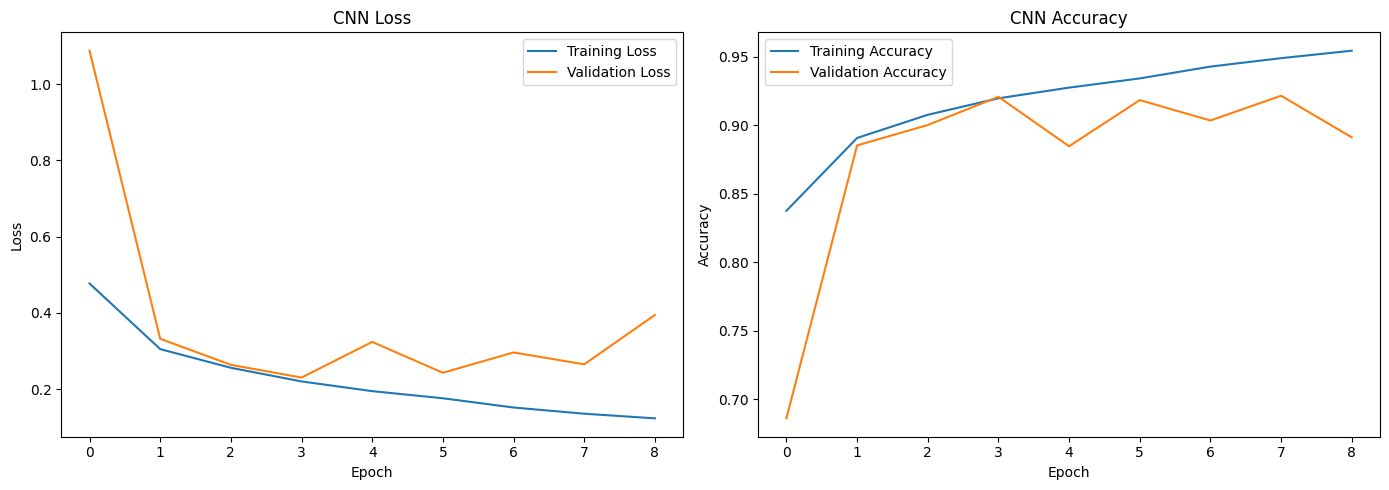

In [16]:
# Plot training history for the CNN
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


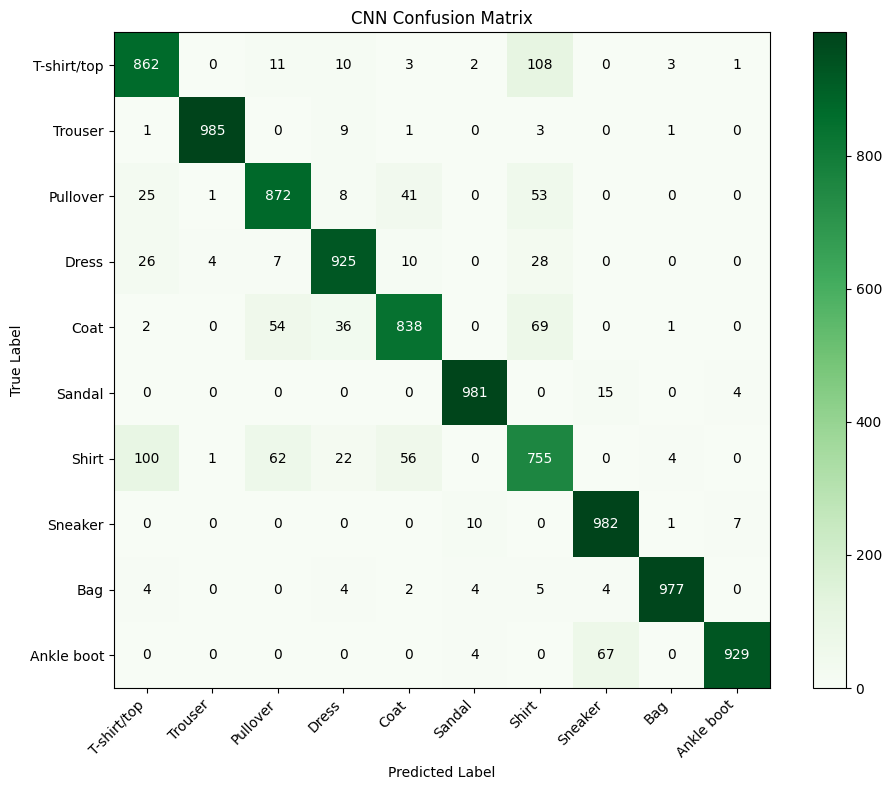

CNN Classification Report
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.86      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.87      0.87      0.87      1000
       Dress       0.91      0.93      0.92      1000
        Coat       0.88      0.84      0.86      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.74      0.76      0.75      1000
     Sneaker       0.92      0.98      0.95      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.99      0.93      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [17]:
# Confusion matrix and classification report for the CNN
cnn_predictions = cnn_model.predict(test_images_cnn)
cnn_pred_labels = np.argmax(cnn_predictions, axis=1)

cnn_cm = confusion_matrix(test_labels, cnn_pred_labels)
plt.figure(figsize=(10, 8))
plt.imshow(cnn_cm, interpolation='nearest', cmap='Greens')
plt.title('CNN Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45, ha='right')
plt.yticks(tick_marks, class_names)

for i in range(cnn_cm.shape[0]):
    for j in range(cnn_cm.shape[1]):
        plt.text(j, i, format(cnn_cm[i, j], 'd'),
                 ha='center', va='center', color='white' if cnn_cm[i, j] > cnn_cm.max() / 2 else 'black')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

print('CNN Classification Report')
print(classification_report(test_labels, cnn_pred_labels, target_names=class_names))


In [18]:
# Compare model performances
print(f'ANN Test Accuracy: {ann_test_acc:.4f}')
print(f'CNN Test Accuracy: {cnn_test_acc:.4f}')

confusion_pairs = [
    ('Shirt', 'Coat'),
    ('Sandal', 'Sneaker'),
    ('Dress', 'Coat')
]
print('Potentially confusing class pairs:')
for pair in confusion_pairs:
    print(f'- {pair[0]} vs {pair[1]}')

misclassified_indices = np.where(test_labels != cnn_pred_labels)[0]
print(f'Number of misclassified test samples (CNN): {len(misclassified_indices)}')


ANN Test Accuracy: 0.8875
CNN Test Accuracy: 0.9106
Potentially confusing class pairs:
- Shirt vs Coat
- Sandal vs Sneaker
- Dress vs Coat
Number of misclassified test samples (CNN): 894
